## Forecasting "Unemployment Rate" Using AR and ARMA models (data from FRED)

In [7]:
import pandas as pd

In [8]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv(r"C:\Users\golna\OneDrive\Desktop\Personal Projects\UNRATE.csv")

In [11]:
print(df.head(10))

  observation_date  UNRATE
0       1948-01-01     3.4
1       1948-02-01     3.8
2       1948-03-01     4.0
3       1948-04-01     3.9
4       1948-05-01     3.5
5       1948-06-01     3.6
6       1948-07-01     3.6
7       1948-08-01     3.9
8       1948-09-01     3.8
9       1948-10-01     3.7


In [12]:
df['observation_date'] = pd.to_datetime(df['observation_date'])

In [13]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

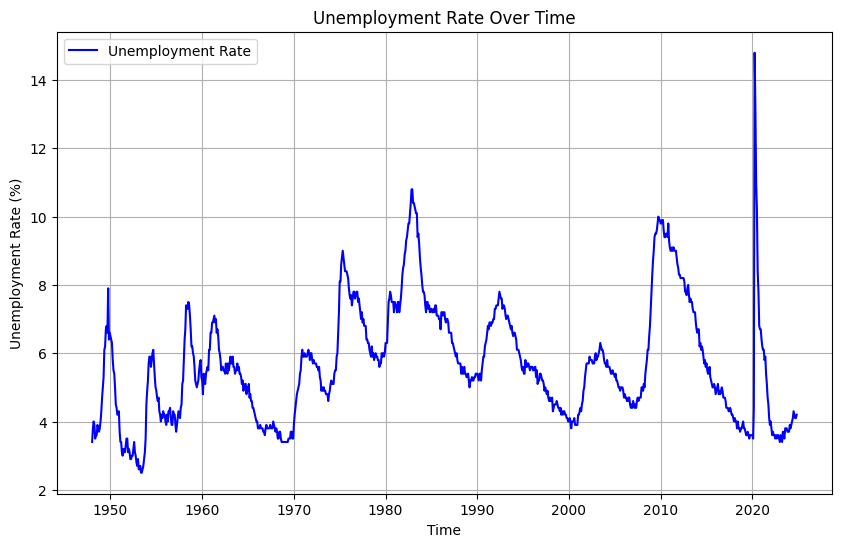

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df['observation_date'], df['UNRATE'], label="Unemployment Rate", color="blue")
plt.title("Unemployment Rate Over Time")
plt.xlabel("Time")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
result = adfuller(df['UNRATE'].dropna())

In [17]:
print("ADF statistics:", result[0])
print("P-value:", result[1])
if result[1] <= 0.05:
    print("The time-series process is stationary")
else:
    print("The time-series process is not stationary")

ADF statistics: -3.925966418139469
P-value: 0.001851845344222856
The time-series process is stationary


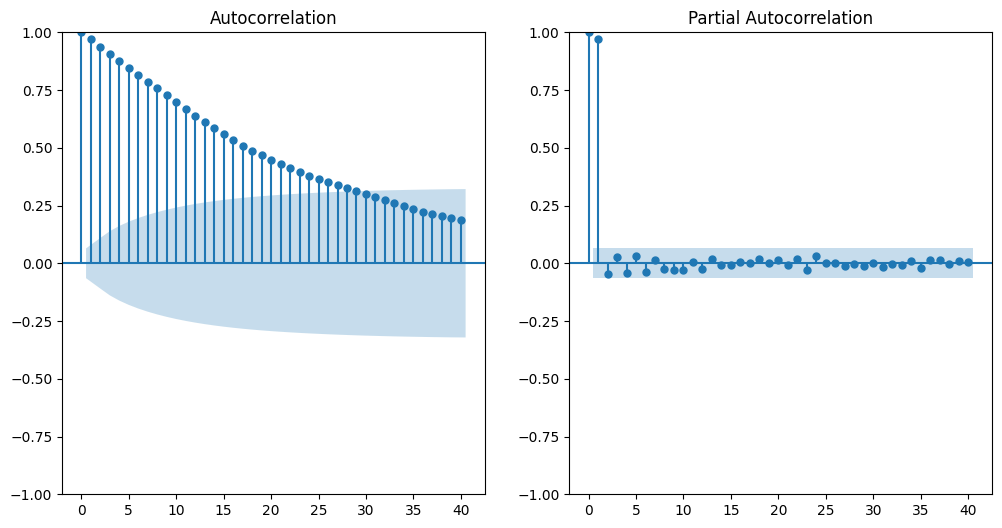

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['UNRATE'].dropna(), lags=40, ax = plt.gca())
plt.subplot(122)
plot_pacf(df['UNRATE'].dropna(), lags=40, ax = plt.gca())
plt.show()

In [19]:
from statsmodels.tsa.ar_model import AutoReg
model_AR2 = AutoReg(df['UNRATE'], lags=2)
model_fit_AR2 = model_AR2.fit()
print(model_fit_AR2.summary())

                            AutoReg Model Results                             
Dep. Variable:                 UNRATE   No. Observations:                  923
Model:                     AutoReg(2)   Log Likelihood                -493.491
Method:               Conditional MLE   S.D. of innovations              0.413
Date:                Sun, 12 Jan 2025   AIC                            994.983
Time:                        11:12:48   BIC                           1014.284
Sample:                             2   HQIC                          1002.348
                                  923                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1802      0.048      3.777      0.000       0.087       0.274
UNRATE.L1      1.0199      0.033     31.003      0.000       0.955       1.084
UNRATE.L2     -0.0515      0.033     -1.566      0.1

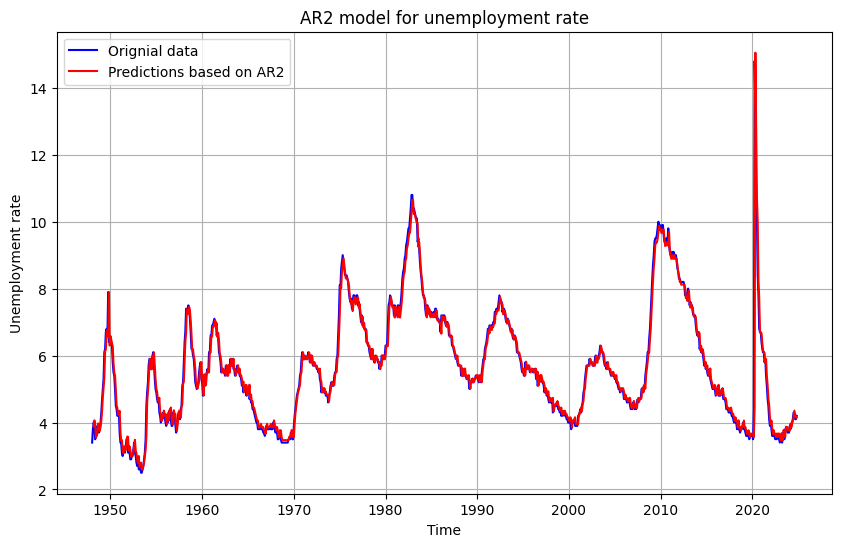

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df['observation_date'], df['UNRATE'], label = "Orignial data", color = "blue")
plt.plot(df['observation_date'][2:], model_fit_AR2.fittedvalues, label = "Predictions based on AR2", color = "red")
plt.title("AR2 model for unemployment rate")
plt.xlabel('Time')
plt.ylabel('Unemployment rate')
plt.legend()
plt.grid(True)
plt.show()

# Overfitting Concerns- Solution: Split data 

In [21]:
min_value = df['UNRATE'].min()
print(f"Minimum value in UNRATE:, {min_value}")
max_value = df['UNRATE'].max()
print(f"Maximum value in UNRATE:, {max_value}")

Minimum value in UNRATE:, 2.5
Maximum value in UNRATE:, 14.8


In [23]:
date_range = pd.date_range(start='1948-01-01', end='2024-11-01')
unrate_data = np.linspace(2.5, 14.8, len(date_range))
df = pd.DataFrame({
    'observation': date_range,
    'UNRATE': unrate_data
})

In [24]:
from sklearn.model_selection import TimeSeriesSplit 
tssp = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tssp.split(df):
    train_df = df.iloc[train_index]
    test_df = df.iloc[test_index]
    print("Train Data (UNRATE):", train_df['UNRATE'].tolist())
    print("Test Data (UNRATE):", test_df['UNRATE'].tolist())
    print("\n" + "-"*50 + "\n")

Train Data (UNRATE): [2.5, 2.500438283922463, 2.500876567844926, 2.501314851767389, 2.5017531356898517, 2.5021914196123145, 2.5026297035347778, 2.5030679874572406, 2.5035062713797034, 2.5039445553021666, 2.5043828392246295, 2.5048211231470923, 2.5052594070695555, 2.5056976909920183, 2.506135974914481, 2.506574258836944, 2.507012542759407, 2.50745082668187, 2.507889110604333, 2.508327394526796, 2.508765678449259, 2.5092039623717217, 2.5096422462941845, 2.510080530216648, 2.5105188141391106, 2.5109570980615734, 2.5113953819840367, 2.5118336659064995, 2.5122719498289623, 2.512710233751425, 2.5131485176738884, 2.513586801596351, 2.514025085518814, 2.5144633694412772, 2.51490165336374, 2.515339937286203, 2.515778221208666, 2.516216505131129, 2.5166547890535917, 2.5170930729760546, 2.517531356898518, 2.5179696408209806, 2.5184079247434434, 2.5188462086659067, 2.5192844925883695, 2.5197227765108323, 2.520161060433295, 2.5205993443557584, 2.521037628278221, 2.521475912200684, 2.521914196123147

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
for train_index, test_index in tssp.split(df):
    train_df = df.iloc[train_index]
    test_df = df.iloc[test_index]
    date_train = np.array(range(len(train_df))).reshape(-1, 1)
    unrate_train = train_df['UNRATE']
    model.fit(date_train, unrate_train)
    unrate_hat_train = model.predict(date_train)
    train_mse = mean_squared_error(unrate_train, unrate_hat_train)
    date_test = np.array(range(len(test_df))).reshape(-1, 1)
    unrate_test = test_df['UNRATE']
    unrate_hat_test = model.predict(date_test)
    test_mse = mean_squared_error(unrate_test, unrate_hat_test)
    print(f"Train MSE: {train_mse}")
    print(f"Test MSE: {test_mse}")
    if train_mse < test_mse:
        print("Overfitting is true. Model is not performing well.")
    else:
        print("No concerns of overfitting")

Train MSE: 9.228661230950939e-32
Test MSE: 4.207293270212151
Overfitting is true. Model is not performing well.
Train MSE: 8.637044735238817e-31
Test MSE: 16.818386878221684
Overfitting is true. Model is not performing well.
Train MSE: 2.616326837217614e-31
Test MSE: 37.833282552863785
Overfitting is true. Model is not performing well.
Train MSE: 7.014626551796908e-31
Test MSE: 67.25198029413845
Overfitting is true. Model is not performing well.
Train MSE: 9.663444901052671e-31
Test MSE: 105.07448010204564
Overfitting is true. Model is not performing well.


## Results: train_mse is very small indicating that the model is performing well in training. However, the test_mse is increasing as we move toword more splits, indicating that the model is not performing well on the test data. We need other models for the prediction. 